In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


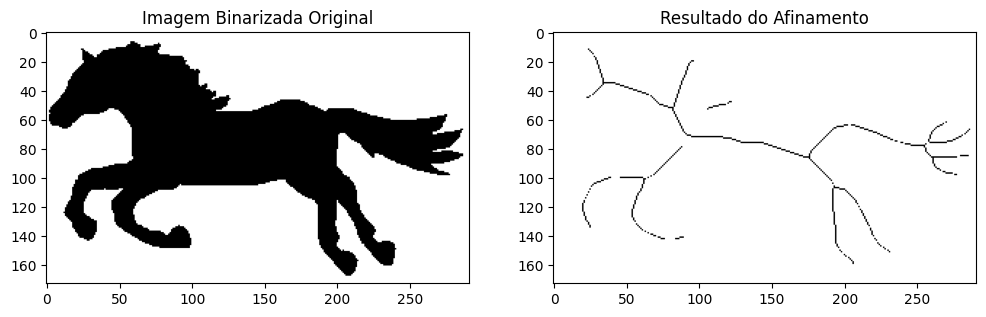

In [ ]:

masks = [
    np.array([[ 0,  0,  0],
              [-1,  1, -1],
              [ 1,  1,  1]]),
    
    np.array([[-1,  0,  0],
              [ 1,  1,  0],
              [-1,  1, -1]]),
    
    np.array([[ 1, -1,  0],
              [ 1,  1,  0],
              [ 1, -1,  0]]),
    
    np.array([[-1,  1, -1],
              [ 1,  1,  0],
              [-1,  0,  0]]),
    
    np.array([[ 1,  1,  1],
              [-1,  1, -1],
              [ 0,  0,  0]]),
    
    np.array([[-1,  1, -1],
              [ 0,  1,  1],
              [ 0,  0, -1]]),
    
    np.array([[ 0, -1,  1],
              [ 0,  1,  1],
              [ 0, -1,  1]]),
    
    np.array([[ 0,  0, -1],
              [ 0,  1,  1],
              [-1,  1, -1]])
]

def hit_or_miss(image, mask):

    J = (mask == 1).astype(np.uint8)  
    K = (mask == 0).astype(np.uint8)  
    
    eroded_J = cv2.erode(image, J)
    eroded_K = cv2.erode(255 - image, K)
    
    return cv2.bitwise_and(eroded_J, eroded_K)

def thinning(image):
    img = image.copy()
    prev = np.zeros_like(img)
    
    while True:
        marker = np.zeros_like(img)
        for mask in masks:
            hitmiss = hit_or_miss(img, mask)
            marker = cv2.bitwise_or(marker, hitmiss)
        
        img = cv2.subtract(img, marker)
        
        if np.array_equal(img, prev):
            break
            
        prev = img.copy()
    
    return img

img = cv2.imread('horse.png', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
binary_inv = cv2.bitwise_not(binary) 


thinned = thinning(binary_inv)
result = cv2.bitwise_not(thinned)  

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(binary, cmap='gray'), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Resultado do Afinamento')
plt.show()